# <font color=black> Dataset Information </font>
## <font color=black>Title: Haberman's Survival Data </font>

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999
Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Number of Instances: 306
Number of Attributes: 4 (including the class attribute)
Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
Missing Attribute Values: None

This Dataset has been taken from Kaggle https://www.kaggle.com/gilsousa/habermans-survival-data-set/data

## Understanding the Haberman's Dataset for classification 
### Our Objective is to find which feature has strong contribution towards classification
 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the haberman's dataset in pandas dataset
haberman_ds = pd.read_csv('haberman.csv')

In [2]:
#viewing dataset structure
haberman_ds.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
print(haberman_ds.shape)
#returns (number of rows, number of columns)
#where number of rows = Training examples for ML Models
# and number of columns = features including the last column i.e. status which is class attribute

(306, 4)


In [4]:
# checking if this dataset is balanced or skewed
haberman_ds['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Clearly, we can see that this dataset is imbalanced as the counts for patient who died within 5 years after surgery is 81 i.e. class attribute 2 and patient survived for 5 years or longer is 225 i.e. class attribute 1. 

## 2-D Scatter plot

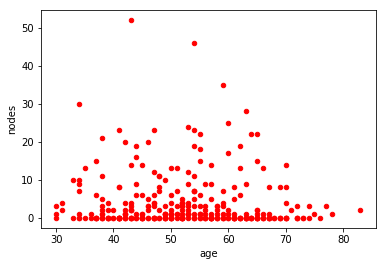

In [5]:
#2-D scatter plot
haberman_ds.plot(kind='scatter', x = 'age', y = 'nodes', color = 'r')
plt.show()

Can't get any insigth by this plot, Hence classifying the status by color coding each points

## 3-D scatter plot 

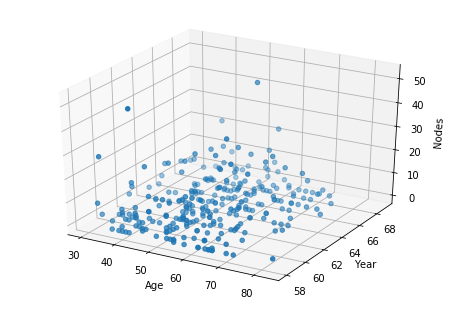

In [6]:
#Since we have only three features, We can visualize the data in 3-d Dimensions
#Using matlab 3D plotting library
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(haberman_ds.iloc[:,0],haberman_ds.iloc[:,1],haberman_ds.iloc[:,2])
ax.set_xlabel('Age')
ax.set_ylabel('Year')
ax.set_zlabel('Nodes')
plt.show()

### Observations
Not able to classify if a plane in 3-D space will classify status

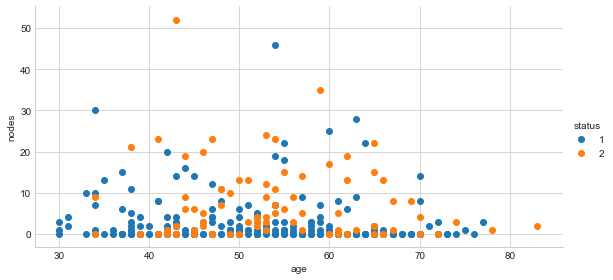

In [18]:
#seaborn library
sns.set_style('whitegrid')
sns.FacetGrid(data=haberman_ds,hue='status',size=4,aspect=2) \
    .map(plt.scatter,"age","nodes") \
    .add_legend()
plt.show()

### Observation
We can't classify using age and year by looking at plot. Since, the features value is less than 6, We will opt for Pair plot now. 

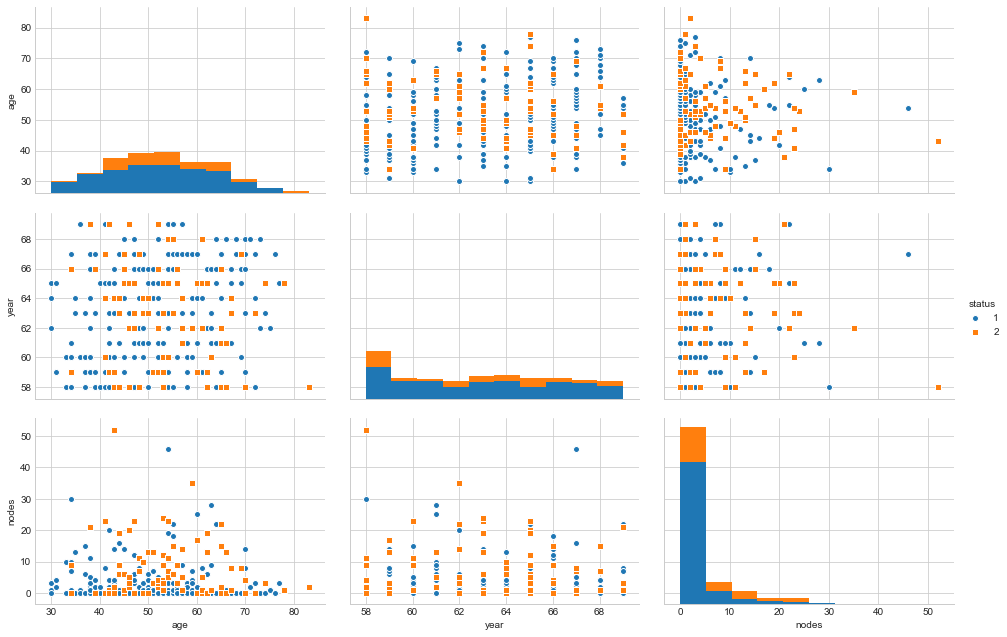

In [8]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data=haberman_ds,hue='status',size=3,vars=haberman_ds.columns[:haberman_ds.shape[1]-1],aspect=1.5, \
            markers=["o", "s"])
plt.show()

#### Observations
* All data points are overlapping
* Neither of the combinations of these features can classfy between status 1 and 2.

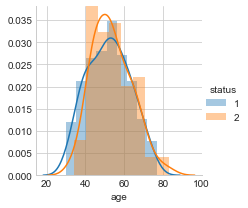

In [9]:
#plotting histogram and PDF for this to look the data distribution
#since histogram/PDF can be plotted with one variables, we need to plot three histogram for other 3 variables
#plotting histogram for Age variables
import warnings as wn
wn.filterwarnings('ignore')
sns.FacetGrid(data=haberman_ds,hue='status',size=3)\
    .map(sns.distplot,"age").add_legend()
plt.show()

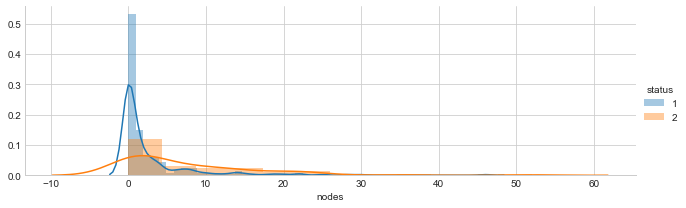

In [10]:
#plotting histogram for Nodes variables
sns.FacetGrid(data=haberman_ds,hue='status',size=3,aspect=3)\
    .map(sns.distplot,"nodes").add_legend()
plt.show()

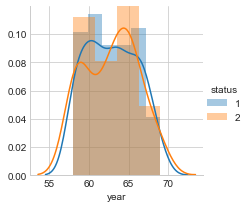

In [11]:
#plotting histogram for year variables
sns.FacetGrid(data=haberman_ds,hue='status',size=3)\
    .map(sns.distplot,"year").add_legend()
plt.show()

### Observations
* The PDF for all the dependent variables are overalapping
* None of the dependent variables has significance in classfying the status. 

## Statistical Inference for Haberman's Dataset

### Box Plot with whisker's


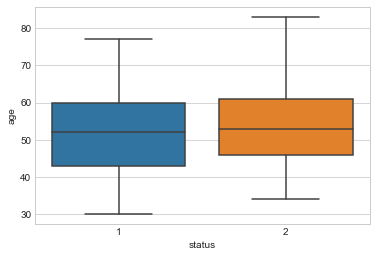

In [12]:
#Using Seaborn Boxplot method
sns.boxplot(x='status',y='age',data=haberman_ds)
plt.show()

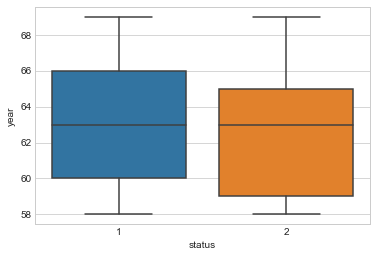

In [13]:
#Using Seaborn Boxplot method
sns.boxplot(x='status',y='year',data=haberman_ds)
plt.show()

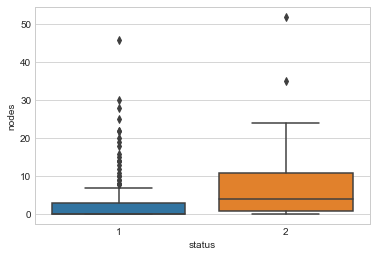

In [14]:
#Using Seaborn Boxplot method
sns.boxplot(x='status',y='nodes',data=haberman_ds)
plt.show()

### Observations:
* For box plot using variable " Age ", it's clearly visible that their IQR is almost overlapping, means middle value spread is same. So, significance of Age variabes towards classification is almost null.
* For box plot using Variable " year ", it's contribution is almost same as Age variable. However, Data are widely spread in the IQR region.
* For the box plot using Variable " Nodes ", the overlapping is very less as compared to the other variables. As, we can see that the 75 percentile of data for status 1 is lesser than the 50 percentile of status 2. But still there are overlapping of 25-50 percentile of status 2 with IQR of status 1.

### Violin plot

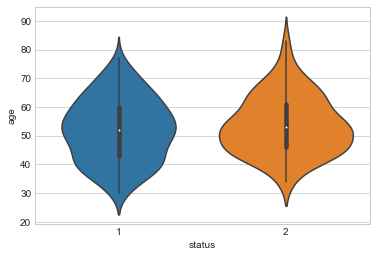

In [15]:
#using seaborn library 
sns.violinplot(x='status',y='age',data=haberman_ds,size=5)
plt.show()

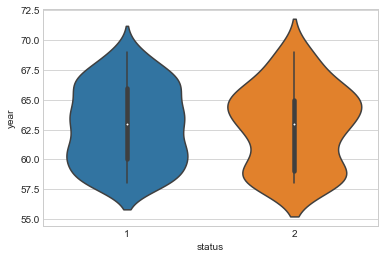

In [16]:
#using seaborn library 
sns.violinplot(x='status',y='year',data=haberman_ds,size=5)
plt.show()

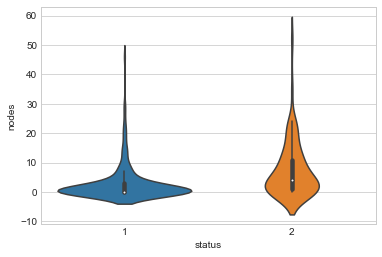

In [17]:
#using seaborn library 
sns.violinplot(x='status',y='nodes',data=haberman_ds,size=5)
plt.show()

### Observation:
* For Age and year plot, it's clearly visible that density of data points lie on the same region, i.e. age around 30 year to 80 year and for year of operation, they are overlapping each other.
* For nodes plot, there are more desnity lying around IQR for status but for status 2 data are widely distributed as compared to status 1. 


### Conclusion:
Given the original dataset and by just having these three features i.e. age, year and auxilary nodes, We are unable to classify betwen the status 1 and 2.